In [1]:
import pandas as pd
import numpy as np

# 🔹 Load dataset
file_path = 'environment_monitoring.sensors_datas.csv'  # ✅ Use your actual path
df = pd.read_csv(file_path)

# 🔹 Display basic info
print("✅ Dataset Loaded Successfully!")
print(df.head())
print("\n🔎 Dataset Info:")
print(df.info())

# 🔹 Parse 'timestamp' into datetime
df['local_timestamp'] = pd.to_datetime(df['local_timestamp'], errors='coerce')

# 🔹 Drop rows with null timestamps
df = df.dropna(subset=['local_timestamp'])

# 🔹 Drop unwanted columns (keep only useful ones)
columns_to_keep = ['local_timestamp', 'temperature', 'humidity', 'air_quality', 'noise_level']
df = df[columns_to_keep]

# 🔹 Drop any other rows with NaN in selected columns
df = df.dropna()

# 🔹 Sort by timestamp
df = df.sort_values(by='local_timestamp')

# 🔹 Reset index and set timestamp as new index
df = df.set_index('local_timestamp')

# ✅ Final check
print("\n✅ Final Processed Dataset:")
print(df.head())
print(f"Shape: {df.shape}")


✅ Dataset Loaded Successfully!
                        _id  temperature  humidity  air_quality  noise_level  \
0  680cb11a2a8a477d1c78c751         33.1      73.8           89            3   
1  680cb1572a8a477d1c78c752         33.2      73.7          101            2   
2  680cb1952a8a477d1c78c753         33.2      73.7           65           28   
3  680cb1d22a8a477d1c78c754         33.2      73.7           94            3   
4  680cb2102a8a477d1c78c755         33.2      73.9           95            9   

                  timestamp        zone           local_timestamp  
0  2025-04-26T10:10:34.078Z  playground                       NaN  
1  2025-04-26T10:11:35.697Z  playground                       NaN  
2  2025-04-26T10:12:37.143Z  playground                       NaN  
3  2025-04-26T10:13:38.812Z  playground                       NaN  
4  2025-04-26T10:14:40.468Z  playground  2025-04-26T15:44:40.468Z  

🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14096 entries

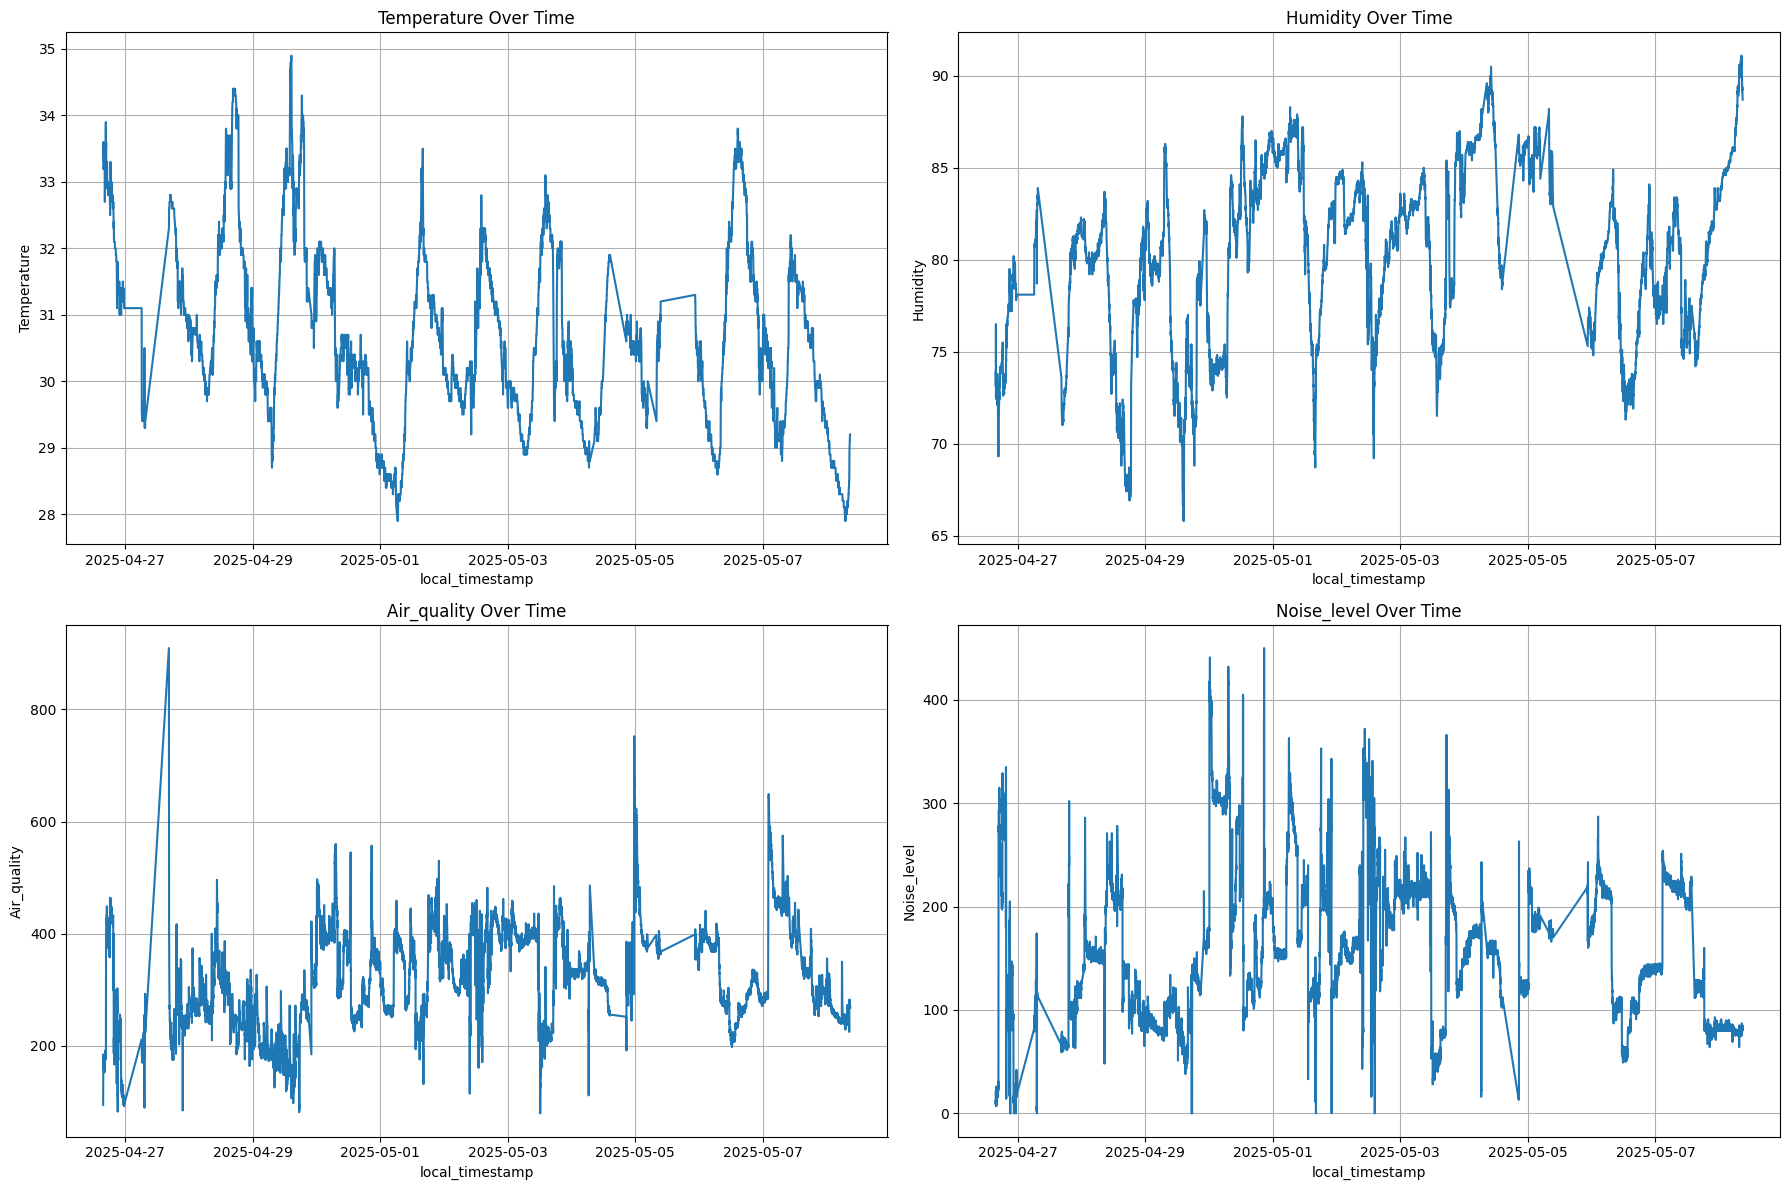

✅ Temporal Pattern Analysis Done!


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to plot
features = ['temperature', 'humidity', 'air_quality', 'noise_level']

# Plotting
plt.figure(figsize=(18, 12))

for idx, feature in enumerate(features):
    plt.subplot(2, 2, idx+1)
    sns.lineplot(data=df, x=df.index, y=feature)
    plt.title(f"{feature.capitalize()} Over Time")
    plt.xlabel('local_timestamp')
    plt.ylabel(feature.capitalize())
    plt.grid(True)

plt.tight_layout()
plt.show()

print("✅ Temporal Pattern Analysis Done!")



🔗 Correlation Matrix:
             temperature  humidity  air_quality  noise_level
temperature     1.000000 -0.872157    -0.273047    -0.200870
humidity       -0.872157  1.000000     0.248000     0.117054
air_quality    -0.273047  0.248000     1.000000     0.785146
noise_level    -0.200870  0.117054     0.785146     1.000000


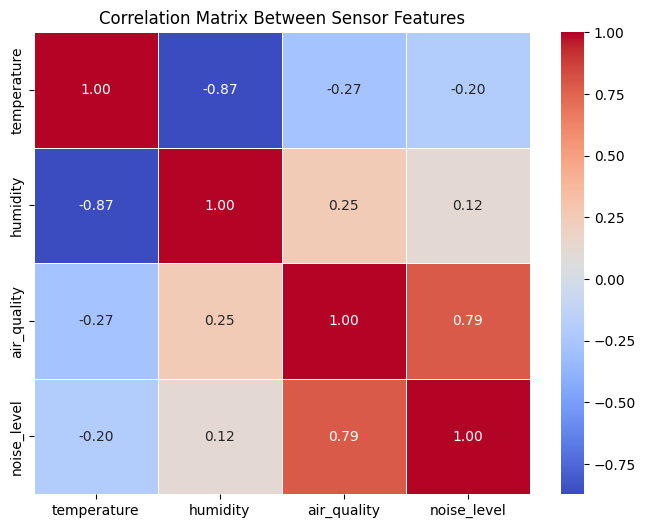

 Correlation Analysis Done!


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Correlation Matrix
correlation_matrix = df.corr()

# Print Correlation Matrix
print("\n🔗 Correlation Matrix:")
print(correlation_matrix)

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Between Sensor Features')
plt.show()

print(" Correlation Analysis Done!")


🔵 Detecting anomalies for temperature...
🔵 Detecting anomalies for humidity...
🔵 Detecting anomalies for air_quality...
🔵 Detecting anomalies for noise_level...


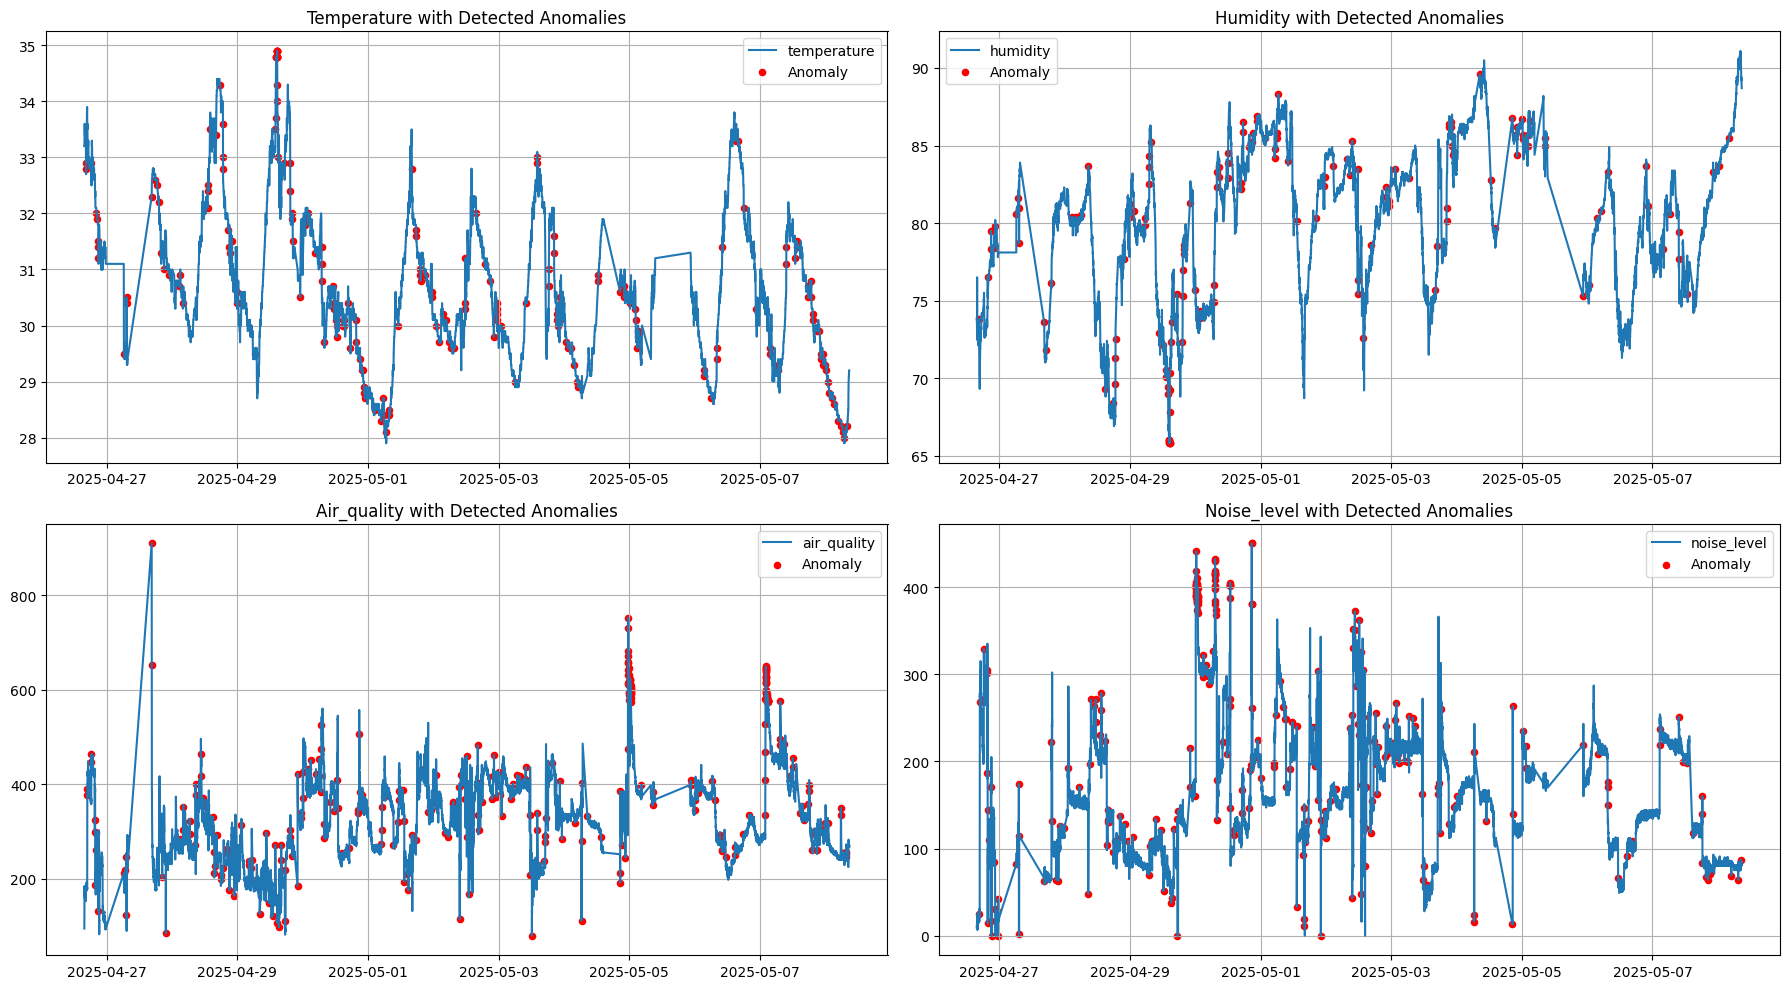

✅ Anomaly Detection Completed!
🔴 Total anomalies detected (any sensor): 807

📊 Anomaly Counts per Sensor:
        Sensor  Anomaly_Count
0  temperature            214
1     humidity            153
2  air_quality            309
3  noise_level            290

📈 Min/Max Values of Anomalies:
            Metric  Value
0  temperature_min   28.0
1     humidity_min   65.8
2  air_quality_min   80.0
3  noise_level_min    0.0
4  temperature_max   34.9
5     humidity_max   90.6
6  air_quality_max  909.0
7  noise_level_max  450.0

🔥 Top 5 Critical Air Quality Spikes:
                                  temperature  humidity  air_quality  \
local_timestamp                                                        
2025-04-27 16:29:20.157000+00:00         32.3      73.6          909   
2025-05-04 23:36:45.340000+00:00         30.5      86.4          752   
2025-05-04 23:34:41.831000+00:00         30.4      86.4          731   
2025-05-04 23:39:49.247000+00:00         30.5      86.3          681   
2025-05-

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 0: Load and clean data ---
df = pd.read_csv('environment_monitoring.sensors_datas.csv')

# Parse timestamp column to datetime
df['local_timestamp'] = pd.to_datetime(df['local_timestamp'], errors='coerce')

# Drop rows where parsing failed
df = df.dropna(subset=['local_timestamp'])

# Select relevant columns
df = df[['local_timestamp', 'temperature', 'humidity', 'air_quality', 'noise_level']]
df = df.dropna()

# Sort by timestamp and set index
df = df.sort_values(by='local_timestamp')
df.set_index('local_timestamp', inplace=True)

# --- Step 1: Z-Score Based Detection ---
def detect_anomalies_zscore(df, feature, threshold=3):
    mean_val = df[feature].mean()
    std_val = df[feature].std()
    z_scores = (df[feature] - mean_val) / std_val
    return np.abs(z_scores) > threshold

# --- Step 2: Moving Average Based Detection ---
def detect_anomalies_moving_avg(df, feature, window=20, threshold=3):
    rolling_mean = df[feature].rolling(window=window).mean()
    rolling_std = df[feature].rolling(window=window).std()
    upper_bound = rolling_mean + threshold * rolling_std
    lower_bound = rolling_mean - threshold * rolling_std
    return (df[feature] > upper_bound) | (df[feature] < lower_bound)

# --- Step 3: Sudden Jump Detection (NEW) ---
def detect_anomalies_sudden_jump(df, feature, jump_threshold):
    diff = df[feature].diff().abs()
    return diff > jump_threshold

# --- Configuration ---
features = ['temperature', 'humidity', 'air_quality', 'noise_level']
jump_thresholds = {
    'temperature': 5.0,
    'humidity': 7.0,
    'air_quality': 150,
    'noise_level': 100
}
anomaly_results = {}

# --- Step 4: Detect anomalies for each feature using all methods ---
for feature in features:
    print(f"🔵 Detecting anomalies for {feature}...")
    anomalies_z = detect_anomalies_zscore(df, feature)
    anomalies_ma = detect_anomalies_moving_avg(df, feature)
    anomalies_jump = detect_anomalies_sudden_jump(df, feature, jump_thresholds[feature])
    
    anomalies_combined = anomalies_z | anomalies_ma | anomalies_jump
    anomaly_results[feature] = anomalies_combined

# --- Step 5: Plot anomalies ---
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs = axs.ravel()

for idx, feature in enumerate(features):
    axs[idx].plot(df.index, df[feature], label=feature)
    axs[idx].scatter(df.index[anomaly_results[feature]], df[feature][anomaly_results[feature]],
                     color='red', label='Anomaly', s=20)
    axs[idx].set_title(f"{feature.capitalize()} with Detected Anomalies")
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

# --- Step 6: Save anomalies to CSV ---
anomalies_df = pd.DataFrame({feature+'_anomaly': anomaly_results[feature] for feature in features})
full_anomalies = df.join(anomalies_df)

# Filter rows where any anomaly occurred
anomalies_detected = full_anomalies[
    full_anomalies[[f'{f}_anomaly' for f in features]].any(axis=1)
]
anomalies_detected.to_csv('detected_anomalies.csv')
print("✅ Anomaly Detection Completed!")
print(f"🔴 Total anomalies detected (any sensor): {len(anomalies_detected)}")

# --- Step 7: Anomaly Count per Sensor ---
anomaly_counts = {
    feature: anomaly_results[feature].sum()
    for feature in features
}
anomaly_counts_df = pd.DataFrame(list(anomaly_counts.items()), columns=['Sensor', 'Anomaly_Count'])
anomaly_counts_df.to_csv('anomaly_counts_summary.csv', index=False)
print("\n📊 Anomaly Counts per Sensor:")
print(anomaly_counts_df)

# --- Step 8: Min/Max Values of Anomalies ---
df_anomalies = df[anomaly_results['air_quality'] | anomaly_results['noise_level'] |
                  anomaly_results['temperature'] | anomaly_results['humidity']]

min_max_values = {
    f'{feature}_min': df_anomalies[feature].min()
    for feature in features
}
min_max_values.update({
    f'{feature}_max': df_anomalies[feature].max()
    for feature in features
})
min_max_df = pd.DataFrame(min_max_values.items(), columns=['Metric', 'Value'])
min_max_df.to_csv('anomaly_min_max_summary.csv', index=False)
print("\n📈 Min/Max Values of Anomalies:")
print(min_max_df)

# --- Step 9: Top 5 Critical Air Quality Spikes ---
top5_air_quality = df_anomalies.sort_values(by='air_quality', ascending=False).head(5)
top5_air_quality = top5_air_quality[['temperature', 'humidity', 'air_quality', 'noise_level']]
top5_air_quality.to_csv('top5_air_quality_spikes.csv')
print("\n🔥 Top 5 Critical Air Quality Spikes:")
print(top5_air_quality)

print("\n✅ All anomaly summary files saved!")


In [5]:
# Define feature groups
group_1_features = ['temperature', 'humidity']
group_2_features = ['air_quality', 'noise_level']

# Create two datasets
df_group1 = df[group_1_features].copy()
df_group2 = df[group_2_features].copy()

print("✅ Group 1 Shape:", df_group1.shape)
print("✅ Group 2 Shape:", df_group2.shape)


✅ Group 1 Shape: (14092, 2)
✅ Group 2 Shape: (14092, 2)


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Group definitions based on correlation
group1_features = ['temperature', 'humidity']       # 📈 Temperature-Humidity Group
group2_features = ['air_quality', 'noise_level']     # 📈 AirQuality-NoiseLevel Group

# Create separate copies for each group
group1_data = df[group1_features].copy()
group2_data = df[group2_features].copy()

# Initialize separate scalers
scaler_group1 = MinMaxScaler()
scaler_group2 = MinMaxScaler()

# Fit-transform the data
group1_scaled = scaler_group1.fit_transform(group1_data)
group2_scaled = scaler_group2.fit_transform(group2_data)

print("✅ Group 1 (Temperature + Humidity) normalized shape:", group1_scaled.shape)
print("✅ Group 2 (Air Quality + Noise Level) normalized shape:", group2_scaled.shape)


✅ Group 1 (Temperature + Humidity) normalized shape: (14092, 2)
✅ Group 2 (Air Quality + Noise Level) normalized shape: (14092, 2)


In [7]:
import numpy as np

# Constants
LOOKBACK = 300        
FORECAST_STEPS = 144  # Next 24 hours (10-minute intervals)

# --- Helper function ---
def create_sequences(data, lookback, forecast_steps):
    X, y = [], []
    for i in range(lookback, len(data) - forecast_steps + 1):
        X.append(data[i - lookback:i])
        y.append(data[i:i + forecast_steps])
    return np.array(X), np.array(y)

# --- Apply to Group 1 (Temperature-Humidity) ---
X_group1, y_group1 = create_sequences(group1_scaled, LOOKBACK, FORECAST_STEPS)

# --- Apply to Group 2 (Air Quality-Noise Level) ---
X_group2, y_group2 = create_sequences(group2_scaled, LOOKBACK, FORECAST_STEPS)

print("✅ Group 1 (Temperature-Humidity):")
print(f"X_group1 shape: {X_group1.shape}, y_group1 shape: {y_group1.shape}")

print("✅ Group 2 (AirQuality-NoiseLevel):")
print(f"X_group2 shape: {X_group2.shape}, y_group2 shape: {y_group2.shape}")


✅ Group 1 (Temperature-Humidity):
X_group1 shape: (13649, 300, 2), y_group1 shape: (13649, 144, 2)
✅ Group 2 (AirQuality-NoiseLevel):
X_group2 shape: (13649, 300, 2), y_group2 shape: (13649, 144, 2)


In [8]:
# --- Step: Train-Test Split ---

# Group 1: Temperature & Humidity
split_g1 = int(0.8 * len(X_group1))

X_train_g1, X_test_g1 = X_group1[:split_g1], X_group1[split_g1:]
y_train_g1, y_test_g1 = y_group1[:split_g1], y_group1[split_g1:]

# Group 2: Air Quality & Noise Level
split_g2 = int(0.8 * len(X_group2))

X_train_g2, X_test_g2 = X_group2[:split_g2], X_group2[split_g2:]
y_train_g2, y_test_g2 = y_group2[:split_g2], y_group2[split_g2:]

# ✅ Print Shapes
print("\n✅ Group 1 (Temperature + Humidity):")
print("X_train_g1:", X_train_g1.shape)
print("X_test_g1 :", X_test_g1.shape)
print("y_train_g1:", y_train_g1.shape)
print("y_test_g1 :", y_test_g1.shape)

print("\n✅ Group 2 (Air Quality + Noise Level):")
print("X_train_g2:", X_train_g2.shape)
print("X_test_g2 :", X_test_g2.shape)
print("y_train_g2:", y_train_g2.shape)
print("y_test_g2 :", y_test_g2.shape)



✅ Group 1 (Temperature + Humidity):
X_train_g1: (10919, 300, 2)
X_test_g1 : (2730, 300, 2)
y_train_g1: (10919, 144, 2)
y_test_g1 : (2730, 144, 2)

✅ Group 2 (Air Quality + Noise Level):
X_train_g2: (10919, 300, 2)
X_test_g2 : (2730, 300, 2)
y_train_g2: (10919, 144, 2)
y_test_g2 : (2730, 144, 2)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# --- Function to Build Model ---
def build_better_lstm_model(input_shape, output_dim):
    model = Sequential()
    
    # Input Layer
    model.add(Input(shape=input_shape))
    
    # LSTM Layers
    model.add(LSTM(128, activation='tanh', return_sequences=True))
    model.add(Dropout(0.3))  # Regularization
    
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.3))  # Regularization
    
    # Output Layer
    model.add(Dense(output_dim))
    
    # Compile
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mse'
    )
    
    return model


In [10]:
# Rebuild Group 1 model (Temperature + Humidity)
model_g1 = build_better_lstm_model(input_shape=(300, 2), output_dim=144*2)

# Rebuild Group 2 model (Air Quality + Noise Level)
model_g2 = build_better_lstm_model(input_shape=(300, 2), output_dim=144*2)


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# --- EarlyStopping Callback ---
early_stopping = EarlyStopping(
    monitor='val_loss',          # Watch validation loss
    patience=10,                 # Stop after 10 epochs without improvement
    restore_best_weights=True    # Restore the best model weights
)

# --- Training Group 1 (Temperature + Humidity) ---
history_g1 = model_g1.fit(
    X_train_g1,
    y_train_g1.reshape(y_train_g1.shape[0], -1),   # Flatten output
    epochs=100,                                   # Max epochs
    batch_size=32,                                # Smaller batch for better generalization
    validation_data=(X_test_g1, y_test_g1.reshape(y_test_g1.shape[0], -1)),
    callbacks=[early_stopping],
    verbose=1
)

# --- Training Group 2 (Air Quality + Noise Level) ---
history_g2 = model_g2.fit(
    X_train_g2,
    y_train_g2.reshape(y_train_g2.shape[0], -1),
    epochs=100,
    batch_size=64,
    validation_data=(X_test_g2, y_test_g2.reshape(y_test_g2.shape[0], -1)),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 71s 200ms/step - loss: 0.0691 - val_loss: 0.0087
Epoch 2/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 57s 166ms/step - loss: 0.0160 - val_loss: 0.0090
Epoch 3/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 67s 197ms/step - loss: 0.0143 - val_loss: 0.0085
Epoch 4/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 88s 259ms/step - loss: 0.0135 - val_loss: 0.0083
Epoch 5/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 85s 249ms/step - loss: 0.0131 - val_loss: 0.0081
Epoch 6/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 107s 312ms/step - loss: 0.0126 - val_loss: 0.0079
Epoch 7/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 91s 265ms/step - loss: 0.0120 - val_loss: 0.0080
Epoch 8/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 58s 169ms/step - loss: 0.0118 - val_loss: 0.0080
Epoch 9/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 56s 163ms/step - loss: 0.0116 - val_loss: 0.0080
Epoch 10/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 55s 161ms/step - loss: 0.0113 - val_loss: 0.0080
Epoch 11/100
342/342 ━━━━━━━━━━━━━━━━━━━━ 56s 163ms/step - loss: 0.0112 - val_loss: 0.0081
Epoch 1

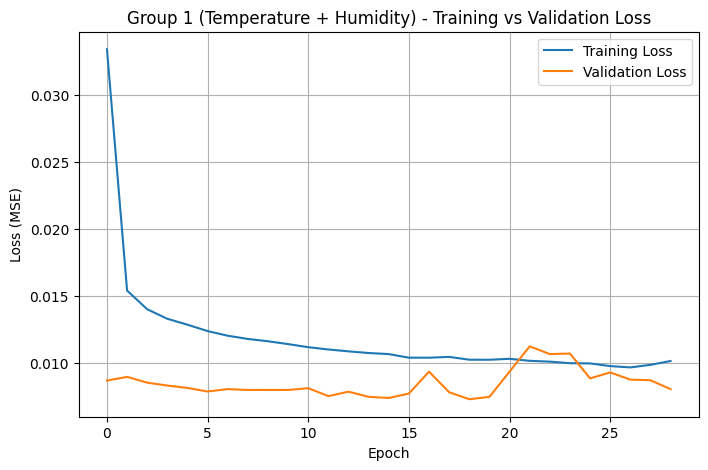

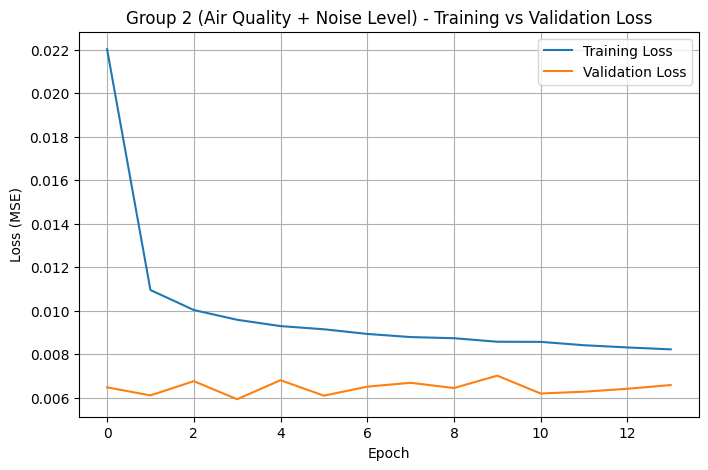

In [12]:
import matplotlib.pyplot as plt

# --- Group 1 Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_g1.history['loss'], label='Training Loss')
plt.plot(history_g1.history['val_loss'], label='Validation Loss')
plt.title('Group 1 (Temperature + Humidity) - Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# --- Group 2 Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_g2.history['loss'], label='Training Loss')
plt.plot(history_g2.history['val_loss'], label='Validation Loss')
plt.title('Group 2 (Air Quality + Noise Level) - Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Group 1: Predict and reshape
y_pred_g1_flat = model_g1.predict(X_test_g1)
y_pred_g1 = y_pred_g1_flat.reshape(-1, FORECAST_STEPS, 2)

# Group 2: Predict and reshape
y_pred_g2_flat = model_g2.predict(X_test_g2)
y_pred_g2 = y_pred_g2_flat.reshape(-1, FORECAST_STEPS, 2)


86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step


In [14]:
# Group 1: Inverse Scaling
y_pred_g1_real, y_test_g1_real = [], []

for i in range(len(y_pred_g1)):
    pred_dummy = np.zeros((FORECAST_STEPS, 2))
    true_dummy = np.zeros((FORECAST_STEPS, 2))
    
    pred_dummy[:, :] = y_pred_g1[i]
    true_dummy[:, :] = y_test_g1[i]
    
    y_pred_g1_real.append(scaler_group1.inverse_transform(pred_dummy))
    y_test_g1_real.append(scaler_group1.inverse_transform(true_dummy))

y_pred_g1_real = np.array(y_pred_g1_real)
y_test_g1_real = np.array(y_test_g1_real)

# Group 2: Inverse Scaling
y_pred_g2_real, y_test_g2_real = [], []

for i in range(len(y_pred_g2)):
    pred_dummy = np.zeros((FORECAST_STEPS, 2))
    true_dummy = np.zeros((FORECAST_STEPS, 2))
    
    pred_dummy[:, :] = y_pred_g2[i]
    true_dummy[:, :] = y_test_g2[i]
    
    y_pred_g2_real.append(scaler_group2.inverse_transform(pred_dummy))
    y_test_g2_real.append(scaler_group2.inverse_transform(true_dummy))

y_pred_g2_real = np.array(y_pred_g2_real)
y_test_g2_real = np.array(y_test_g2_real)


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_metrics(y_true, y_pred, feature_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n Metrics for {feature_name}:")
    print(f"  - MSE: {mse:.4f}")
    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - R²: {r2:.4f}")


In [16]:
# Group 1
evaluate_metrics(y_test_g1_real[:, :, 0].flatten(), y_pred_g1_real[:, :, 0].flatten(), "Temperature")
evaluate_metrics(y_test_g1_real[:, :, 1].flatten(), y_pred_g1_real[:, :, 1].flatten(), "Humidity")

# Group 2
evaluate_metrics(y_test_g2_real[:, :, 0].flatten(), y_pred_g2_real[:, :, 0].flatten(), "Air Quality")
evaluate_metrics(y_test_g2_real[:, :, 1].flatten(), y_pred_g2_real[:, :, 1].flatten(), "Noise Level")



 Metrics for Temperature:
  - MSE: 0.4051
  - RMSE: 0.6365
  - MAE: 0.4699
  - R²: 0.8110

 Metrics for Humidity:
  - MSE: 4.0451
  - RMSE: 2.0112
  - MAE: 1.4563
  - R²: 0.7488

 Metrics for Air Quality:
  - MSE: 3467.5177
  - RMSE: 58.8856
  - MAE: 36.4486
  - R²: 0.5454

 Metrics for Noise Level:
  - MSE: 1382.0171
  - RMSE: 37.1755
  - MAE: 29.3583
  - R²: 0.5574


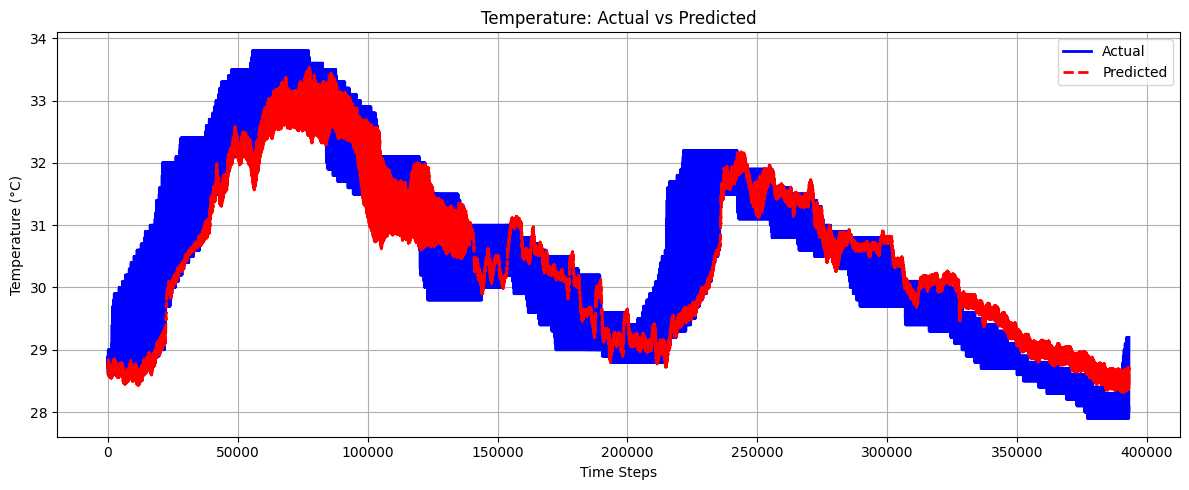

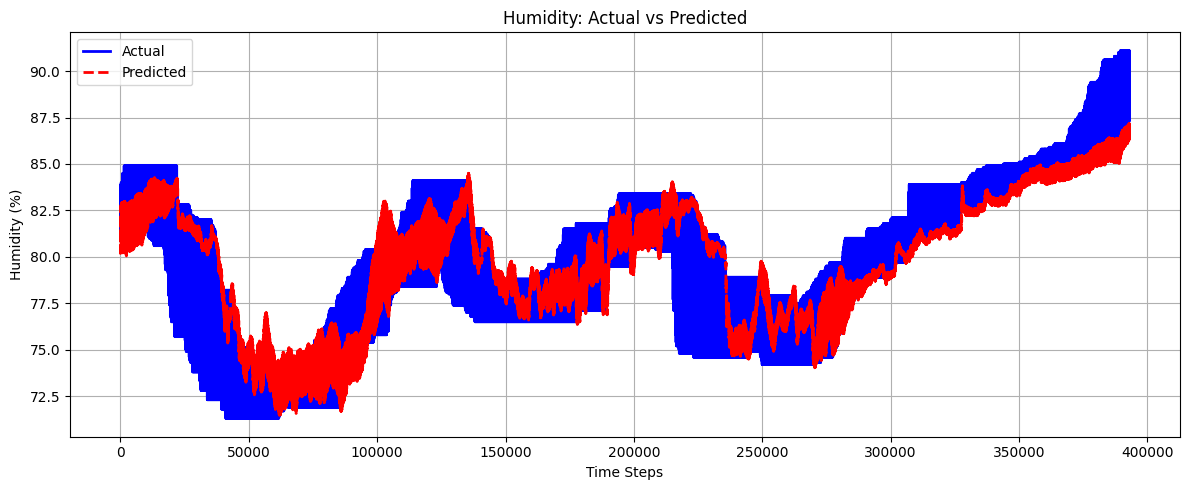

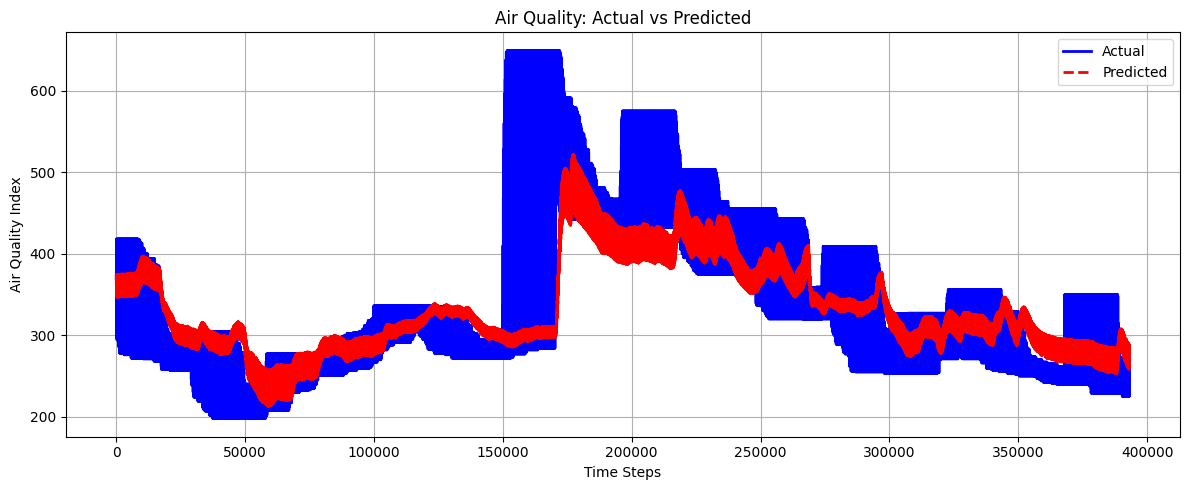

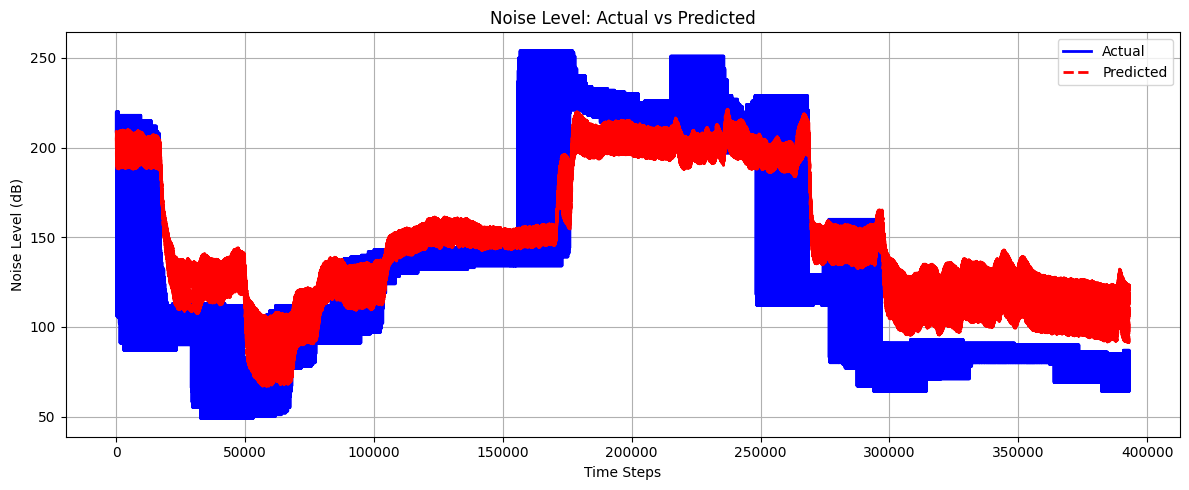

In [17]:
import matplotlib.pyplot as plt

def plot_single_line(y_true, y_pred, title, ylabel):
    plt.figure(figsize=(12, 5))
    plt.plot(y_true.flatten(), label='Actual', color='blue', linewidth=2)
    plt.plot(y_pred.flatten(), label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply to all 4 features
plot_single_line(y_test_g1_real[:, :, 0], y_pred_g1_real[:, :, 0], 'Temperature: Actual vs Predicted', 'Temperature (°C)')
plot_single_line(y_test_g1_real[:, :, 1], y_pred_g1_real[:, :, 1], 'Humidity: Actual vs Predicted', 'Humidity (%)')
plot_single_line(y_test_g2_real[:, :, 0], y_pred_g2_real[:, :, 0], 'Air Quality: Actual vs Predicted', 'Air Quality Index')
plot_single_line(y_test_g2_real[:, :, 1], y_pred_g2_real[:, :, 1], 'Noise Level: Actual vs Predicted', 'Noise Level (dB)')


In [18]:
# Get last known sequence (of shape: (300, 2)) from full scaled dataset
last_seq_g1 = group1_scaled[-LOOKBACK:]  # Temperature + Humidity
last_seq_g2 = group2_scaled[-LOOKBACK:]  # Air Quality + Noise Level

# Reshape for LSTM input: (1, 300, 2)
last_seq_g1 = last_seq_g1.reshape(1, LOOKBACK, 2)
last_seq_g2 = last_seq_g2.reshape(1, LOOKBACK, 2)


In [19]:
# Predict for Group 1
future_pred_g1_scaled = model_g1.predict(last_seq_g1)
future_pred_g1 = future_pred_g1_scaled.reshape(FORECAST_STEPS, 2)
future_pred_g1_real = scaler_group1.inverse_transform(future_pred_g1)

# Predict for Group 2
future_pred_g2_scaled = model_g2.predict(last_seq_g2)
future_pred_g2 = future_pred_g2_scaled.reshape(FORECAST_STEPS, 2)
future_pred_g2_real = scaler_group2.inverse_transform(future_pred_g2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [20]:
# Get last real timestamp
last_time = df.index[-1]

# Generate future timestamps: 144 steps x 10 min
future_times = [last_time + pd.Timedelta(minutes=10*i) for i in range(1, FORECAST_STEPS + 1)]


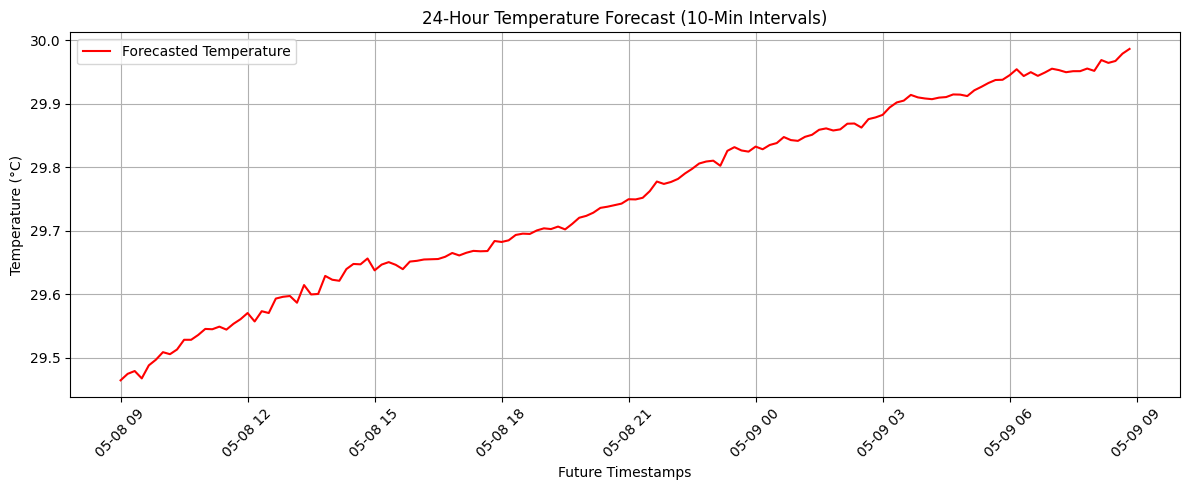

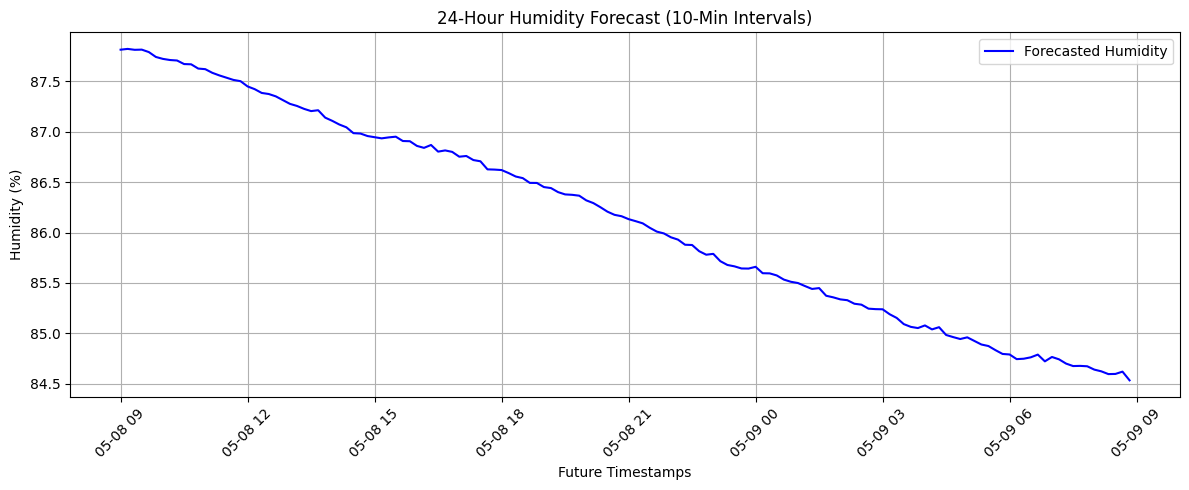

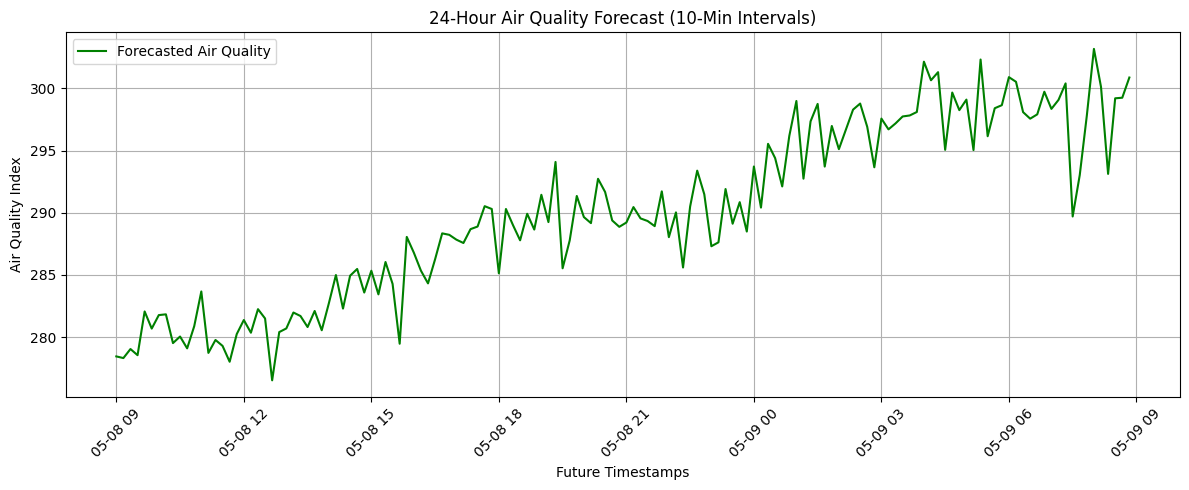

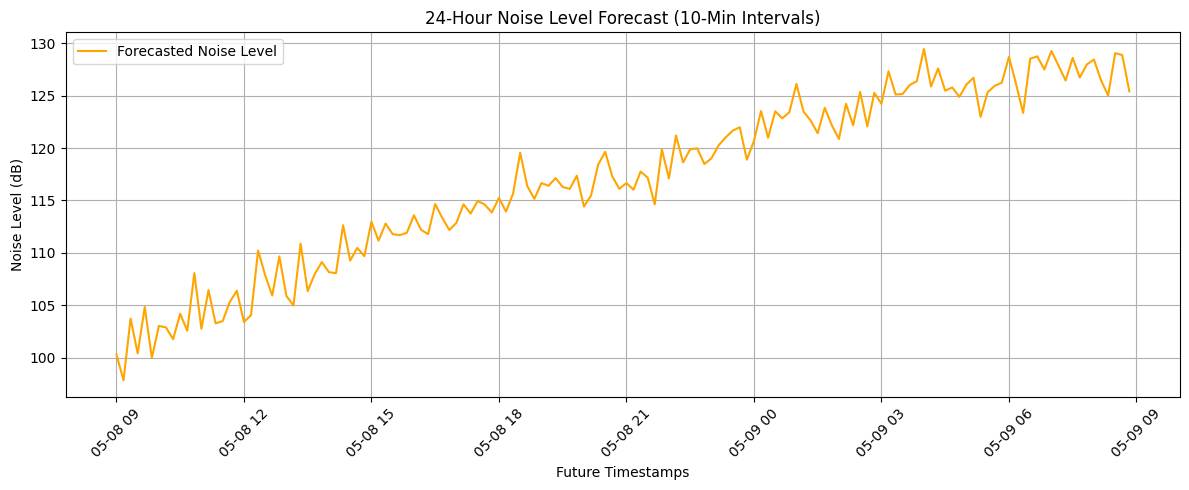

In [21]:
# Temperature Forecast
plt.figure(figsize=(12,5))
plt.plot(future_times, future_pred_g1_real[:, 0], label='Forecasted Temperature', color='red')
plt.title('24-Hour Temperature Forecast (10-Min Intervals)')
plt.xlabel('Future Timestamps')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Humidity Forecast
plt.figure(figsize=(12,5))
plt.plot(future_times, future_pred_g1_real[:, 1], label='Forecasted Humidity', color='blue')
plt.title('24-Hour Humidity Forecast (10-Min Intervals)')
plt.xlabel('Future Timestamps')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Air Quality Forecast
plt.figure(figsize=(12,5))
plt.plot(future_times, future_pred_g2_real[:, 0], label='Forecasted Air Quality', color='green')
plt.title('24-Hour Air Quality Forecast (10-Min Intervals)')
plt.xlabel('Future Timestamps')
plt.ylabel('Air Quality Index')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Noise Level Forecast
plt.figure(figsize=(12,5))
plt.plot(future_times, future_pred_g2_real[:, 1], label='Forecasted Noise Level', color='orange')
plt.title('24-Hour Noise Level Forecast (10-Min Intervals)')
plt.xlabel('Future Timestamps')
plt.ylabel('Noise Level (dB)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


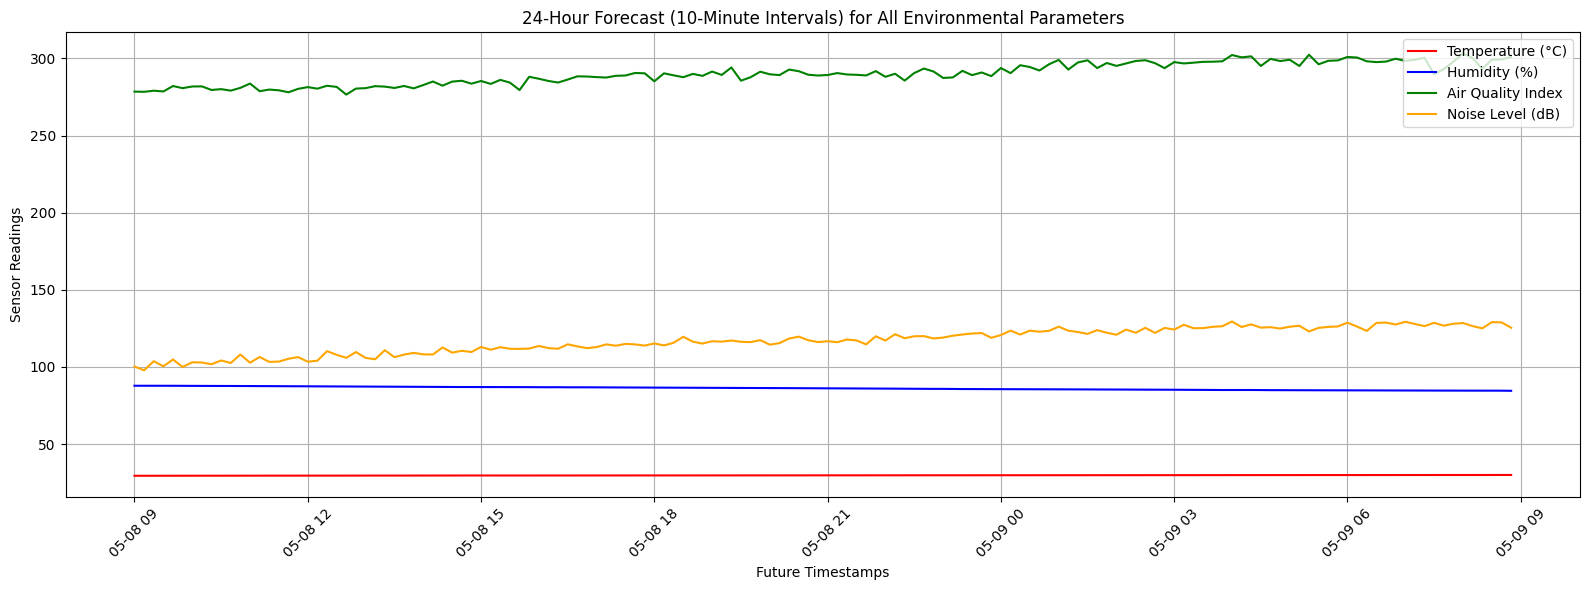

In [22]:
import matplotlib.pyplot as plt

# Plot all four features on a single chart
plt.figure(figsize=(16, 6))

# Forecasts from Group 1
plt.plot(future_times, future_pred_g1_real[:, 0], label='Temperature (°C)', color='red')
plt.plot(future_times, future_pred_g1_real[:, 1], label='Humidity (%)', color='blue')

# Forecasts from Group 2
plt.plot(future_times, future_pred_g2_real[:, 0], label='Air Quality Index', color='green')
plt.plot(future_times, future_pred_g2_real[:, 1], label='Noise Level (dB)', color='orange')

# Chart settings
plt.title('24-Hour Forecast (10-Minute Intervals) for All Environmental Parameters')
plt.xlabel('Future Timestamps')
plt.ylabel('Sensor Readings')
plt.grid(True)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Display chart
plt.show()


In [23]:
import pandas as pd

# Step 1: Extract first N-step predictions (ensure consistency)
N = min(
    len(y_pred_g1_real[0]), 
    len(y_pred_g1_real[0]), 
    len(y_pred_g2_real[0]), 
    len(y_pred_g2_real[0]), 
    144  # target horizon
)

# Step 2: Forecast arrays (ensure all are same length)
forecast_temp = y_pred_g1_real[0][:N, 0].flatten()
forecast_humid = y_pred_g1_real[0][:N, 1].flatten()
forecast_air = y_pred_g2_real[0][:N, 0].flatten()
forecast_noise = y_pred_g2_real[0][:N, 1].flatten()

# Step 3: Future timestamps
future_timestamps = [df.index[-1] + pd.Timedelta(minutes=10 * i) for i in range(1, N + 1)]

# Confirm shapes
print("Lengths:")
print(f"Timestamps: {len(future_timestamps)}")
print(f"Temperature: {len(forecast_temp)}")
print(f"Humidity: {len(forecast_humid)}")
print(f"Air Quality: {len(forecast_air)}")
print(f"Noise Level: {len(forecast_noise)}")

# Step 4: Create DataFrame
forecast_df = pd.DataFrame({
    'timestamp': pd.to_datetime(future_timestamps),
    'temperature': forecast_temp,
    'humidity': forecast_humid,
    'air_quality': forecast_air,
    'noise_level': forecast_noise
})

# Step 5: Save to CSV
forecast_df.to_csv('forecast_24hr_resultsnew.csv', index=False)
print("✅ Forecast saved to forecast_24hr_results.csv")

# Optional Preview
print(forecast_df.head())


Lengths:
Timestamps: 144
Temperature: 144
Humidity: 144
Air Quality: 144
Noise Level: 144
✅ Forecast saved to forecast_24hr_results.csv
                         timestamp  temperature   humidity  air_quality  \
0 2025-05-08 09:00:07.296000+00:00    28.801495  80.235528   373.940508   
1 2025-05-08 09:10:07.296000+00:00    28.797845  80.178096   374.351889   
2 2025-05-08 09:20:07.296000+00:00    28.792265  80.243143   369.236165   
3 2025-05-08 09:30:07.296000+00:00    28.794887  80.389111   373.734681   
4 2025-05-08 09:40:07.296000+00:00    28.792358  80.306209   371.022937   

   noise_level  
0   205.439334  
1   204.460609  
2   209.042130  
3   203.782734  
4   206.273232  


In [24]:
print("Lengths of forecast arrays:")
print("Temperature:", len(forecast_temp))
print("Humidity:", len(forecast_humid))
print("Air Quality:", len(forecast_air))
print("Noise Level:", len(forecast_noise))
print("Timestamps:", len(future_timestamps))


Lengths of forecast arrays:
Temperature: 144
Humidity: 144
Air Quality: 144
Noise Level: 144
Timestamps: 144
